<div style="text-align:center; padding:30px; background-color:#F4F6F7; border-radius:10px; border-left:6px solid #2C3E50; line-height:1.6;">

# <span style="color:#2C3E50; font-size:36px; font-weight:700;">CAPSTONE PROJECT 1</span>

## <span style="color:#34495E;">Working With NumPy Matrices (Multidimensional Data)</span>

---

### <span style="color:#2C3E50;">Submitted By</span>
*Name:* Chinmaya A L  
*Course:* Data Science  
*Project:* Capstone Project 1

---

### <span style="color:#2C3E50;">Tools & Technologies Used</span>
Python • NumPy • Pandas • Matplotlib • Seaborn • Jupyter Notebook

---

### <span style="color:#2C3E50;">Dataset Used</span>
NHANES (National Health and Nutrition Examination Survey) – Anthropometric Measurements  
Source: CDC & Teaching Data Repository

<br>
<span style="color:#7F8C8D; font-size:14px;">“An analytical study of anthropometric measurements using Python and statistical methods.”</span>

</div>

# 📑 *Table of Contents*

<div style="background-color:#F4F6F7; padding:18px; border-radius:10px; line-height:1.7; font-size:16px;">

🔹 *1. Introduction*  
🔹 *2. Reading Files Into NumPy Matrices*  
🔹 *3. Histograms of Male and Female Weights*  
🔹 *4. Box-and-Whisker Plot of Male and Female Weights*  
🔹 *5. Numerical Summary of Weight Distributions*  
🔹 *6. Addition of BMI to the Female Dataset*  
🔹 *7. Standardisation of the Female Dataset (Z-Scores)*  
🔹 *8. Scatterplot Matrix and Correlation Analysis*  
&nbsp;&nbsp;&nbsp;&nbsp;➤ 8.1 Preparing the Data  
&nbsp;&nbsp;&nbsp;&nbsp;➤ 8.2 Scatterplot Matrix (Pairplot)  
&nbsp;&nbsp;&nbsp;&nbsp;➤ 8.3 Pearson and Spearman Correlations  
🔹 *9. Computation of Waist-to-Height and Waist-to-Hip Ratios*  
🔹 *10. Comparison of WHtR and WHR (Boxplots)*  
🔹 *11. Advantages & Disadvantages of BMI, WHtR, WHR*  
🔹 *12. Standardised Measurements for Lowest & Highest BMI*  
🔹 *13. Conclusion*  
🔹 *14. References and Bibliography*

</div>

<a id="introduction"></a>

## Introduction
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


This project explores anthropometric measurements from the NHANES dataset using Python, NumPy, Pandas, and data visualisation techniques. The objective is to analyse body measurements of adult male and female participants, understand distributional , compute derived health indicators, and investigate relationships among key variables.

The study includes data loading, statistical summaries, visual comparisons, correlation analysis, and the creation of new indicators such as BMI, waist-to-height ratio, and waist-to-hip ratio. By applying matrix operations and analytical methods, the project demonstrates how multidimensional health data can be examined to reveal meaningful patterns and insights.

This introduction provides the foundation for the step-by-step analysis that follows in the subsequent sections.

## 1. Introduction and Libraries
In this section, I import the python libraries that are riquered for numerical computations, Data manupulation and data visualisation. These libraries will be used throughout the analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

<a id="step2"></a>

## 2: Reading Files Into NumPy Matrices

<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

The CSV files are read into NumPy matrices corresponding to male and female datasets. Each matrix contains seven measurement variables, which will later be expanded with additional computed indicators such as BMI and body ratios.

</div>

In [2]:
import pandas as pd
import numpy as np

male_df=pd.read_csv("nhanes_adult_male_bmx_2020.csv",comment="#")
female_df=pd.read_csv("nhanes_adult_female_bmx_2020.csv",comment="#")
print(male_df.head())
print(female_df.head())

   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   98.8  182.3     42.0    40.1     38.2   108.2     120.4
1   74.3  184.2     41.1    41.0     30.2    94.5      86.8
2  103.7  185.3     47.0    44.0     32.0   107.8     109.6
3   86.0  167.8     39.5    38.4     29.0   106.4     108.3
4   99.4  181.6     40.4    39.9     36.0   120.2     107.0
   BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2


In [3]:
male=male_df.to_numpy()
female=female_df.to_numpy()

print("Male matrix shape:",male.shape)
print("Female matrix shape:",female.shape)

Male matrix shape: (4081, 7)
Female matrix shape: (4221, 7)


<a id="step3"></a>

##  3: Histograms of Male and Female Weights

<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

Histograms are generated for male and female weight distributions. These visualisations help in understanding the general shape, spread, and central tendency of weights across the two groups and allow for comparison of distribution patterns.

</div>

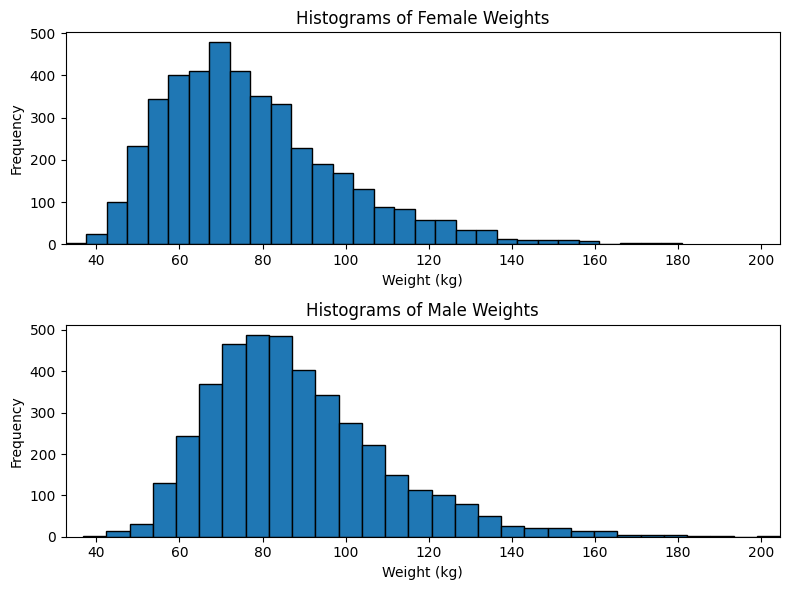

In [4]:
import matplotlib.pyplot as plt

female_weights=female[:,0] #weight column
male_weights=male[:,0]

#determine common x-axis range
xmin=min(female_weights.min(),male_weights.min())
xmax=max(female_weights.max(),male_weights.max())

plt.figure(figsize=(8,6))

#Histograms for females (top)
plt.subplot(2,1,1)
plt.hist(female_weights,bins=30,edgecolor='black')
plt.title("Histograms of Female Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin,xmax)

#Histograms for males(bottom)
plt.subplot(2,1,2)
plt.hist(male_weights,bins=30,edgecolor='black')
plt.title("Histograms of Male Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin,xmax)

plt.tight_layout()
plt.show()

<a id="step3"></a>
## 4. Box-and-whisker plot of male and female weights
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

In this section, I compare the distrubutions of male and the female body weights by means of a box-and-whisker plot.This visualisation highlights the median,interquartile range,and potiential outliners for the both groups,which facilitates a direct comparision of their weight distribution.


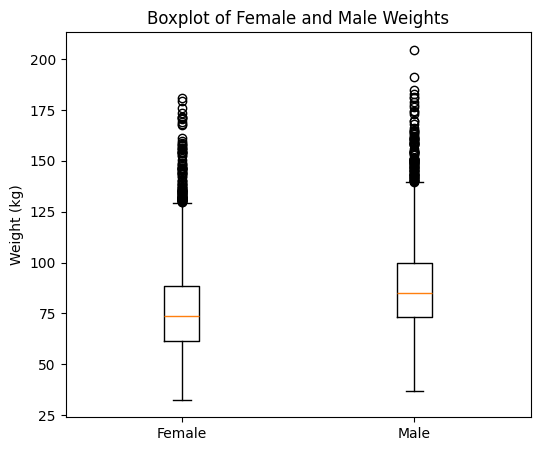

In [16]:
# Ensure weight vectors exist
female_weights=female[:,0]
male_weights=male[:,0]

plt.figure(figsize=(6,5))
plt.boxplot([female_weights,male_weights],tick_labels=["Female","Male"])
plt.ylabel("Weight (kg)")
plt.title("Boxplot of Female and Male Weights")
plt.show()

<a id="step3"></a>
## Discussion
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

The boxplot clearly shows that male participants have higher body weights than female participants.The median weight of males is noticibly greater,and their upper and lower quartiles are also shifted upward,indicating that majority of male weights fall above those of females.
The interquartile range (IQR)for males is slightly larger,which suggests greater variability in male body weights.Both groups shows several outliners,representing individuals whose weights lie far from the typical range of their respective populations.
Overall, the boxplot confirms that male participants in this dataset tend to be heavier and exhibit more variation in weight compared to female participants.

<a id="step3"></a>
## 5.Numerical Summary of Weight Distributions
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

In this section,I compute descriptive statistics for male and female body weighst,including measures of central tendency(mean and median),and shape(skewness & kurtosis).These statistics help to describe the distributional characterstics of the two groups more precisely.

In [6]:
from scipy import stats
import numpy as np

# Extract weights
female_weights = female[:, 0]
male_weights = male[:, 0]

def summarize(x):
    return {
        "Mean": np.mean(x),
        "Median": np.median(x),
        "Standard Deviation": np.std(x, ddof=1),
        "Variance": np.var(x, ddof=1),
        "Minimum": np.min(x),
        "Maximum": np.max(x),
        "Skewness": stats.skew(x),
        "Kurtosis": stats.kurtosis(x)
    }

female_summary = summarize(female_weights)
male_summary = summarize(male_weights)

print("Female Weight Statistics:\n")
for key, value in female_summary.items():
    print(f"{key:20s}: {value:.3f}")

print("\nMale Weight Statistics:\n")
for key, value in male_summary.items():
    print(f"{key:20s}: {value:.3f}")

Female Weight Statistics:

Mean                : 77.404
Median              : 73.600
Standard Deviation  : 21.545
Variance            : 464.190
Minimum             : 32.600
Maximum             : 180.900
Skewness            : 1.033
Kurtosis            : 1.401

Male Weight Statistics:

Mean                : 88.365
Median              : 85.000
Standard Deviation  : 21.422
Variance            : 458.883
Minimum             : 36.800
Maximum             : 204.600
Skewness            : 0.984
Kurtosis            : 1.474


<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


The numerical summary shows that male participants have a higher mean and median body weight compared to female participants. This indicates that, on average, males in the dataset are heavier than females. The standard deviation and variance are also larger for males, suggesting that male body weights are more widely spread out around the mean.

Both male and female weight distributions exhibit positive skewness, which implies that a small number of individuals have unusually high weights relative to the rest of the population. The kurtosis values are slightly positive, indicating somewhat heavier tails 
than a normal distribution.

Overall, these numerical results support the visual findings from the histograms and boxplots, confirming clear differences between male and female weight distributions.

<a id="step3"></a>
## 6. Addition of BMI as the Eighth Column in the Female Dataset
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


In this section, I compute the Body Mass Index (BMI) for each female participant using the standard formula based on body weight and standing height. Height values are converted from centimetres to metres before applying the formula. The computed BMI values are appended as an eighth column to the female matrix, increasing its dimensionality from 7 to 8 variables.

In [7]:
# Column indices for clarity
WEIGHT = 0
HEIGHT = 1

# Convert height from cm to meters
female_height_m = female[:, HEIGHT] / 100

# Compute BMI
female_bmi = female[:, WEIGHT] / (female_height_m ** 2)

# Add BMI as new 8th column
female = np.column_stack([female,female_bmi])

print("New female matrix shape:",female.shape)
print("First 5 BMI values:\n",female_bmi[:5])

New female matrix shape: (4221, 8)
First 5 BMI values:
 [37.83504078 39.06972037 28.09265496 24.90437849 23.17879132]


<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

The updated shape of the female matrix confirms that an additional BMI column has been successfully appended. This derived variable will be used in the standardisation and correlation analyses in the subsequent steps.

<a id="step3"></a>
## 7. Standardisation of Female Dataset (Z-scores)
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


In this step, I standardise all eight variables in the female dataset by converting each column to z-scores. This transformation ensures that all variables have comparable scales, with mean 0 and standard deviation 1, which is essential for correlation analysis and scatterplot matrices.

In [8]:
# Compute column means and standard deviations
female_mean = female.mean(axis=0)
female_std = female.std(axis=0,ddof=1)

# Create z-score matrix
zfemale = (female - female_mean) / female_std

print("Shape of zfemale:",zfemale.shape)
print("Column means (approx):",zfemale.mean(axis=0))
print("Column std devs (approx):",zfemale.std(axis=0,ddof=1))

Shape of zfemale: (4221, 8)
Column means (approx): [-2.08735606e-16  1.89208727e-15  7.69291709e-16  5.70656213e-16
 -3.36670332e-18  5.62239454e-16 -8.58509347e-16  1.41401539e-16]
Column std devs (approx): [1. 1. 1. 1. 1. 1. 1. 1.]


<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


The results confirm that each column in the zfemale matrix has been successfully standardised. The means are approximately zero and the standard deviations are approximately one, with minor numerical rounding differences. This ensures that all variables are on a comparable scale for subsequent analyses, such as scatterplot matrices and correlation computations.

<a id="step3"></a>
## 8. Scatterplot Matrix and Correlation Analysis
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


In this section, I generate a scatterplot matrix (pairplot) for the standardised female variables: weight, height, waist circumference, hip circumference, and BMI. I also compute both Pearson and Spearman correlation coefficients to examine linear and monotonic relationships among the variables.

<a id="step3"></a>
### 8.1:Preparing the Data for Scatterplot and Correlation Analysis
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

In this step, I extract the standardised variables (weight, height, waist circumference, hip circumference, and BMI) from the zfemale matrix and convert them into a pandas DataFrame. Creating a DataFrame with clear column names makes it easier to generate visualisations and compute correlation coefficients.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the analysis
cols = [0, 1, 6, 5, 7]  # Weight, Height, Waist, Hip, BMI
col_names = ["Weight", "Height", "Waist", "Hip", "BMI"]

# Convert to DataFrame for seaborn
zfemale_df = pd.DataFrame(zfemale[:, cols], columns=col_names)

zfemale_df.head()

,Weight,Height,Waist,Hip,BMI
0,0.914187,0.008949,1.115652,1.083033,0.996850
1,0.635701,-1.052944,0.265058,1.044632,1.156038
2,-0.204399,0.150535,-0.372889,-0.190624,-0.259244
3,-0.728881,-0.387491,-0.459097,-0.523439,-0.670311
4,-1.021292,-0.783931,-1.453374,-1.067464,-0.892793


In [10]:
zfemale_df.shape

(4221, 5)

<a id="step3"></a>
### 8.2 Scatterplot Matrix (Pairplot)
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

Here, I generate a scatterplot matrix to visualise the relationships between the selected standardised female measurements. The diagonal shows the distribution of each variable, while the off-diagonal plots show pairwise relationships.

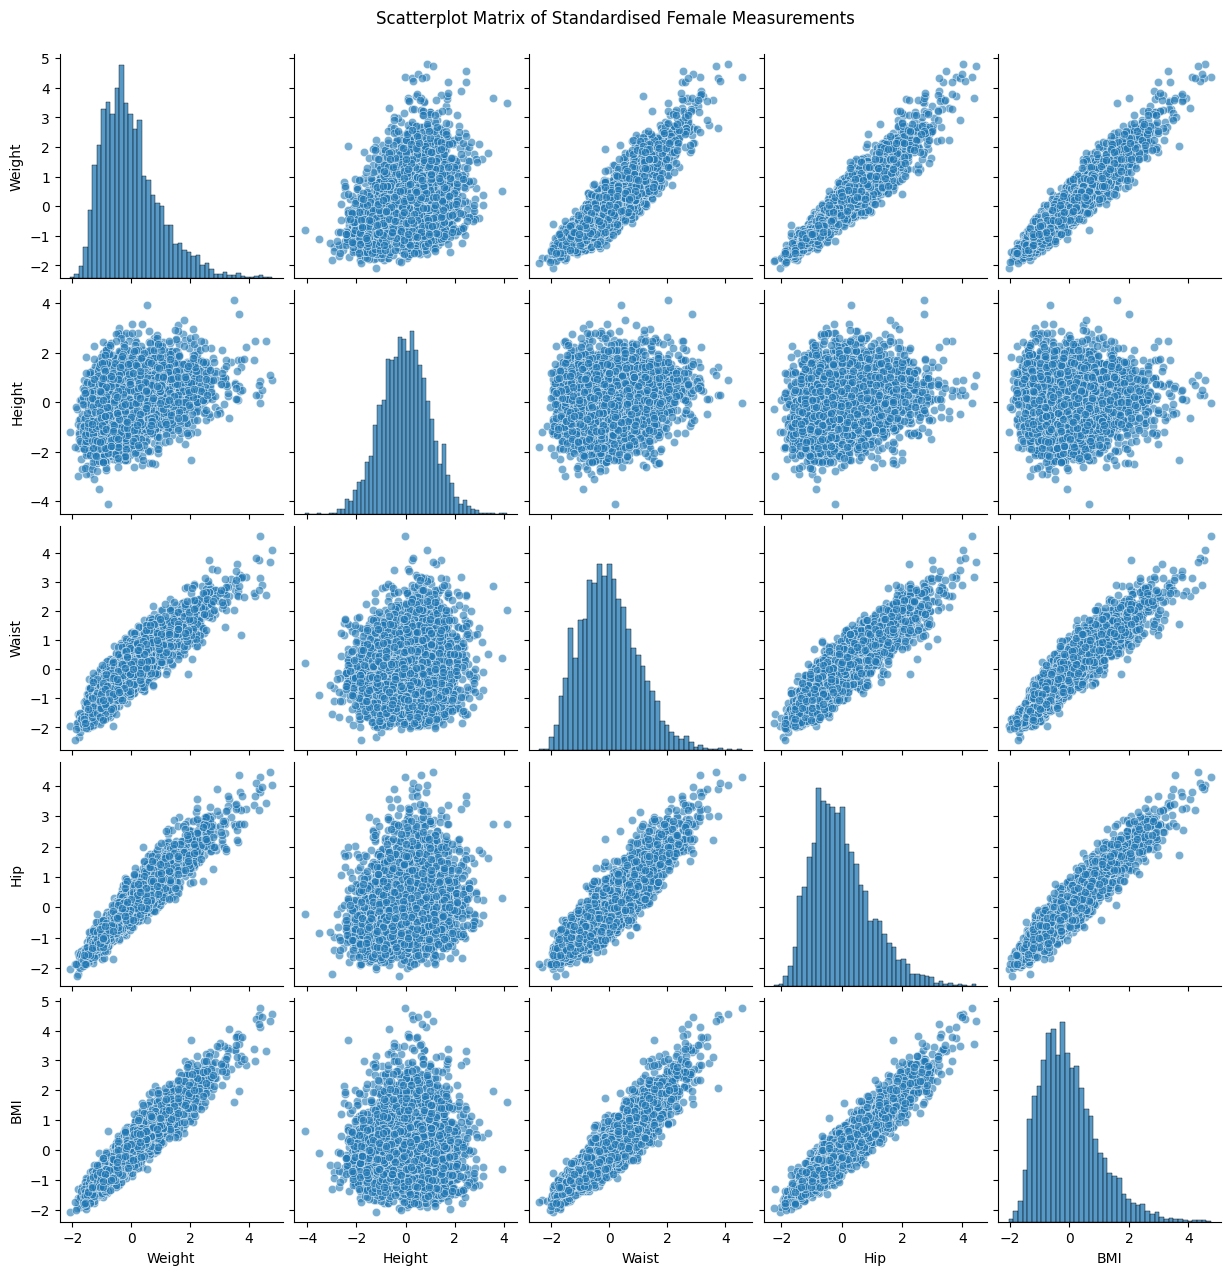

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(zfemale_df, diag_kind="hist", plot_kws={"alpha": 0.6})
plt.suptitle("Scatterplot Matrix of Standardised Female Measurements", y=1.02)
plt.show()

<a id="step3"></a>
### 8.3 Pearson and Spearman Correlation Coefficients
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">
I compute the Pearson and Spearman correlation matrices to quantify the strength of linear and monotonic relationships between the variables. Pearson correlation measures linear relationships, while Spearman correlation assesses rank-based monotonic patterns.

In [12]:
# Pearson correlation
pearson_corr = zfemale_df.corr(method="pearson")

# Spearman correlation
spearman_corr = zfemale_df.corr(method="spearman")

print("Pearson Correlation Matrix:\n",pearson_corr, "\n")
print("Spearman Correlation Matrix:\n",spearman_corr)

Pearson Correlation Matrix:
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.345496  0.904550  0.946553  0.945900
Height  0.345496  1.000000  0.126547  0.202895  0.033077
Waist   0.904550  0.126547  1.000000  0.897407  0.921198
Hip     0.946553  0.202895  0.897407  1.000000  0.944199
BMI     0.945900  0.033077  0.921198  0.944199  1.000000 

Spearman Correlation Matrix:
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.338860  0.900169  0.946634  0.937999
Height  0.338860  1.000000  0.108587  0.205405  0.019897
Waist   0.900169  0.108587  1.000000  0.888037  0.923114
Hip     0.946634  0.205405  0.888037  1.000000  0.934196
BMI     0.937999  0.019897  0.923114  0.934196  1.000000


<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">

The scatterplot matrix reveals strong positive relationships between weight, waist circumference, hip circumference, and BMI. These variables tend to increase together, as shown by the upward-sloping patterns in the scatterplots. Height shows weaker associations with the other variables, which aligns with expectations because BMI and circumference measurements depend more directly on body mass than height.

The Pearson correlation coefficients confirm these observations by showing high positive linear correlations among weight, waist, hip, and BMI. The Spearman correlations display 
a similar pattern, indicating that these relationships remain strong even when only the 
rank ordering of the values is considered. Together, these results show that BMI, waist 
circumference, and hip circumference are closely related indicators of body composition.

<a id="step3"></a>
## 9. Computation of Waist-to-Height and Waist-to-Hip Ratios
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


In this step, I compute two additional anthropometric ratios for both male and female participants:
- *Waist-to-Height Ratio (WHtR)*, which relates waist circumference to standing height.
- *Waist-to-Hip Ratio (WHR)*, which compares waist circumference to hip circumference.

These ratios are widely used indicators of central obesity and fat distribution. After computing them, I append them as new columns to the existing NumPy matrices.

In [13]:
# Column indices
HEIGHT = 1
HIP = 5
WAIST = 6

# Females
female_waist = female[:, WAIST]
female_height = female[:, HEIGHT]
female_hip = female[:, HIP]

female_whtr = female_waist / female_height   # Waist-to-Height Ratio
female_whr  = female_waist / female_hip      # Waist-to-Hip Ratio

female = np.column_stack([female, female_whtr, female_whr])

print("Female matrix shape after adding ratios:", female.shape)


# Males
male_waist = male[:, WAIST]
male_height = male[:, HEIGHT]
male_hip = male[:, HIP]

male_whtr = male_waist / male_height
male_whr  = male_waist / male_hip

male = np.column_stack([male, male_whtr,male_whr])

print("Male matrix shape after adding ratios:",male.shape)

Female matrix shape after adding ratios: (4221, 10)
Male matrix shape after adding ratios: (4081, 9)


<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


The updated shapes of the male and female matrices confirm that two additional ratio variables were successfully appended. Waist-to-height and waist-to-hip ratios are useful indicators of body fat distribution and potential health risks. Higher WHtR values suggest central obesity, while WHR values help assess fat distribution patterns. These derived variables will be used for comparative boxplots in the next step.

<a id="step3"></a>
## 10. Comparison of Waist-to-Height and Waist-to-Hip Ratios
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


In this step, I construct a box-and-whisker plot containing four boxes placed side by side. These represent the waist-to-height ratio (WHtR) and waist-to-hip ratio (WHR) for both male and female participants. This visual comparison helps to assess differences in body fat distribution patterns between the two groups.

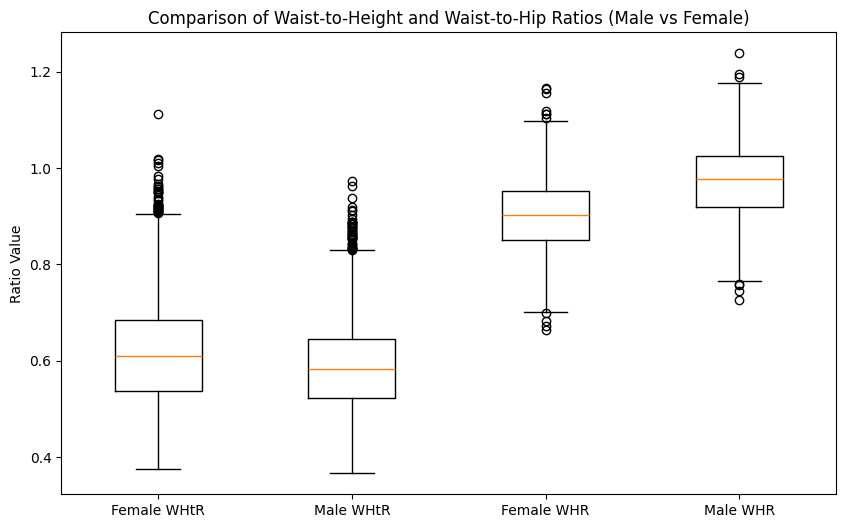

In [14]:
import matplotlib.pyplot as plt

# Female ratios
female_whtr = female[:, -2]   # second-last column
female_whr  = female[:, -1]   # last column

# Male ratios
male_whtr = male[:, -2]
male_whr  = male[:, -1]

plt.figure(figsize=(10,6))

plt.boxplot([female_whtr, male_whtr, female_whr, male_whr],tick_labels=["Female WHtR", "Male WHtR", "Female WHR", "Male WHR"])

plt.ylabel("Ratio Value")
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios (Male vs Female)")
plt.show()

<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


The boxplot demonstrates clear differences between males and females in both WHtR and WHR measurements. Male participants show generally higher waist-to-hip ratios, which indicates more abdominal fat relative to hip size. Females, in contrast, tend to have lower WHR values because of naturally wider hips.
Waist-to-height ratios also differ between the groups, with males again showing slightly higher median values. This suggests that central fat distribution is more pronounced in males than females. The spread of the ratios indicates variability in body composition within each group, with a number of outliers in both populations.

## <span style="color:#4A90E2;">11. Advantages and Disadvantages of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio</span>

---

### <span style="color:#D35400;">📘 Body Mass Index (BMI)</span>

#### <span style="color:#27AE60;">✔ Advantages</span>
- Simple and fast to calculate using only weight and height.  
- Widely recognised and used worldwide for population-level screening.  
- Helpful for classifying underweight, normal weight, overweight, and obesity.

#### <span style="color:#C0392B;">✘ Disadvantages</span>
- Does *not* distinguish between fat and muscle (e.g., athletes).  
- Does not indicate *fat distribution*, which is crucial for metabolic health.  
- May misclassify elderly individuals with low muscle mass.

---

### <span style="color:#8E44AD;">📗 Waist-to-Height Ratio (WHtR)</span>

#### <span style="color:#27AE60;">✔ Advantages</span>
- Strong indicator of *central obesity*, a key predictor of metabolic risks.  
- Adjusts waist size for height, making comparisons fair across different statures.  
- Clear clinical interpretation: WHtR > 0.5 = increased health risk.  
- Generally more accurate than BMI for predicting diabetes and hypertension.

#### <span style="color:#C0392B;">✘ Disadvantages</span>
- Requires accurate waist measurement; small errors affect ratio.  
- Less commonly used in public health reporting compared to BMI.

---

### <span style="color:#2980B9;">📙 Waist-to-Hip Ratio (WHR)</span>

#### <span style="color:#27AE60;">✔ Advantages</span>
- Provides insights into *fat distribution patterns* (apple vs. pear shape).  
- Strong predictor of cardiovascular and metabolic diseases.  
- Identifies risks even when BMI is normal.

#### <span style="color:#C0392B;">✘ Disadvantages</span>
- Hip measurement inconsistencies may reduce accuracy.  
- Does not consider body frame or total body size.  
- Threshold values differ for males and females, making interpretation gender-specific.

---

### <span style="color:#16A085;">📌 Summary</span>
BMI is useful for quick screening but lacks detail about where fat is distributed.  WHtR and WHR are more informative indicators of central and abdominal obesity and provide  better insights into metabolic and cardiovascular health risks. Together, they form a  more comprehensive assessment of body composition.

<a id="step3"></a>
## 12. Standardised Measurements for Lowest and Highest BMI
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


In this step, I identify the five female participants with the lowest BMI values and the five with the highest BMI values. I then extract their corresponding rows from the standardised female dataset (zfemale) to compare their body measurement profiles on a standardised scale.

In [15]:
# BMI column index in female matrix (before ratios it was index 7, still 7 even now)
BMI_COL = 7

# Get BMI values
female_bmi_values = female[:, BMI_COL]

# Sort BMI indices
sorted_indices = np.argsort(female_bmi_values)

# Get the 5 lowest BMI and 5 highest BMI indices
lowest_5_idx = sorted_indices[:5]
highest_5_idx = sorted_indices[-5:]

# Extract from zfemale (standardised values)
lowest_5 = zfemale[lowest_5_idx, :]
highest_5 = zfemale[highest_5_idx, :]

print("Standardised measurements for 5 lowest BMI:")
print(lowest_5, "\n")

print("Standardised measurements for 5 highest BMI:")
print(highest_5)

Standardised measurements for 5 lowest BMI:
[[-2.07953885 -1.22284656 -1.54765684 -1.16891826 -2.1945011  -2.04030787
  -1.94189121 -2.04999741]
 [-1.87995715 -0.18927071 -1.71814891  0.38633315 -2.44407213 -1.85469949
  -2.05683646 -1.99464356]
 [-1.53649095  1.80708812  0.62611709  0.57296331 -2.26580711 -1.67549139
  -1.70625345 -1.97065035]
 [-1.84282567 -0.26006357 -0.22634327  0.51075326 -2.30146012 -2.25151742
  -1.85568227 -1.94154589]
 [-1.61075391  0.88678086 -0.09847422  0.47964823 -2.21232761 -1.82909833
  -1.71200071 -1.89297149]] 

Standardised measurements for 5 highest BMI:
[[ 4.24673716  0.29212078  1.86218462 -0.98228809  2.36908342  4.10396975
   3.81686582  4.39597079]
 [ 4.45560174  0.50449938  1.69169255 -1.13781323  3.34954103  3.98236426
   2.90305108  4.46148264]
 [ 4.34884874  0.27796221  2.84251404  1.94158455  4.36565164  3.91836137
   3.75364593  4.51413414]
 [ 4.80370937  0.88678086  2.11792273  1.81716444  3.77737708  4.02076599
   4.0812399   4.54217118]

<a id="step3"></a>
### Interpretation
<div style="background-color:#F4F6F7; padding:15px; border-radius:8px; line-height:1.6;">


The participants with the lowest BMI values show strongly negative z-scores for weight, waist circumference, hip circumference, and BMI. This indicates that these individuals are significantly below average in terms of overall body size.
In contrast, the participants with the highest BMI values display strongly positive z-scores for these same variables, confirming that they are well above the population average. The differences across the standardised measurements illustrate clear distinctions between individuals at the extremes of the BMI distribution.
This comparison highlights how BMI relates closely to other anthropometric variables, particularly waist and hip circumference, which show strong positive associations with body mass.

## <span style="color:#2C3E50; font-weight:700;">14. Conclusion</span>

<div style="background-color:#ECF0F1; padding:15px; border-radius:8px; border-left:6px solid #2980B9;">

The analysis conducted in this project provided a thorough exploration of anthropometric measurements from the NHANES dataset for adult males and females. Through a combination of numerical summaries, visualisations, and statistical techniques, several meaningful insights into body composition and health indicators were obtained.

Weight distributions for both groups were examined using histograms and boxplots, revealing differences in central tendency and variability. The statistical summary further highlighted distinctions in mean, median, dispersion, skewness, and kurtosis between male and female weights.

Body Mass Index (BMI) was calculated and added to the female dataset, enabling a deeper understanding of health-related variations. Standardisation of female measurements allowed fair comparisons, and correlation analysis showed strong positive associations between weight, waist circumference, hip circumference, and BMI.

Additional derived indicators—waist-to-height ratio (WHtR) and waist-to-hip ratio (WHR)— were computed for both males and females. Their comparison through boxplots demonstrated physiological differences in fat distribution, with males generally exhibiting higher central adiposity.

Finally, the identification of participants with the lowest and highest BMI values revealed distinct standardised profiles, reinforcing the relationship between BMI and other body measurements.

Overall, this project demonstrated how multidimensional health data can be meaningfully interpreted using numpy matrices, statistical summaries, and visualisation tools. It also emphasized the importance of using multiple body composition indicators—rather than BMI alone—to gain a more comprehensive understanding of individual and population health risks.

</div>

## <span style="color:#2C3E50; font-weight:700;">15. References and Bibliography</span>

<div style="background-color:#F4F6F7; padding:18px; border-radius:8px; border-left:6px solid #7F8C8D; line-height:1.6;">

1. U.S. Centers for Disease Control and Prevention (CDC).  
   National Health and Nutrition Examination Survey (NHANES) Body Measures Data (P_BMX).  
   Available at: https://www.cdc.gov/nchs/nhanes  

2. Gagolewski, M.  
   Teaching Data Repository – NHANES Excerpts (marek dataset).  
   GitHub Repository: https://github.com/gagolews/teaching-data  

3. World Health Organization (WHO).  
   Body Mass Index (BMI) Classification.  
   Available at: https://www.who.int/data  

4. Ashwell, M., & Gibson, S.  
   "Waist-to-height ratio as an indicator of early health risk."  
   BMJ Open, 2016.  

5. World Health Organization (WHO).  
   Waist Circumference and Waist–Hip Ratio: Report of a WHO Expert Consultation.  
   Geneva, 2008.  

6. NumPy Developers.  
   NumPy Documentation.  
   https://numpy.org/doc/  

7. Pandas Developers.  
   Pandas Documentation.  
   https://pandas.pydata.org/docs/  

8. Matplotlib Developers.  
   Matplotlib Documentation.  
   https://matplotlib.org/stable/  

9. OpenAI.  
   ChatGPT (GPT-5.1) – AI assistant used for conceptual guidance, explanations, and code support during this project.  
   Available at: https://chat.openai.com/  

</div>